## Evaluation

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model

# load data
train_df = pd.read_pickle("train_df.pkl")
test_df  = pd.read_pickle("test_df.pkl")

model = load_model("model.keras")

# same constants as training
WINDOW = 30
features = ["Open", "High", "Low", "Close", "Volume"]

In [19]:
def predict_one_stock(model, df, stock, window=30, horizon=1):
    s = df[df["Stock"] == stock].copy()

    data = s[features].values
    true_returns = s["Return"].values

    X, y = [], []
    for i in range(window, len(s) - horizon):
        X.append(data[i-window:i])
        y.append(true_returns[i+horizon])

    X = np.array(X)
    y = np.array(y)

    y_pred = model.predict(X, verbose=0).flatten()

    return y, y_pred

In [20]:
def plot_predictions(y_true, y_pred, stock, rmse):
    plt.figure(figsize=(12, 5))

    plt.plot(y_true, label="True Return", linewidth=2)
    plt.plot(y_pred, label="Predicted Return", linewidth=2)

    plt.title(f"{stock} – True vs Predicted Returns (RMSE = {rmse:.5f})")
    plt.xlabel("Time")
    plt.ylabel("Return")

    plt.legend()
    plt.grid(True)
    plt.show()

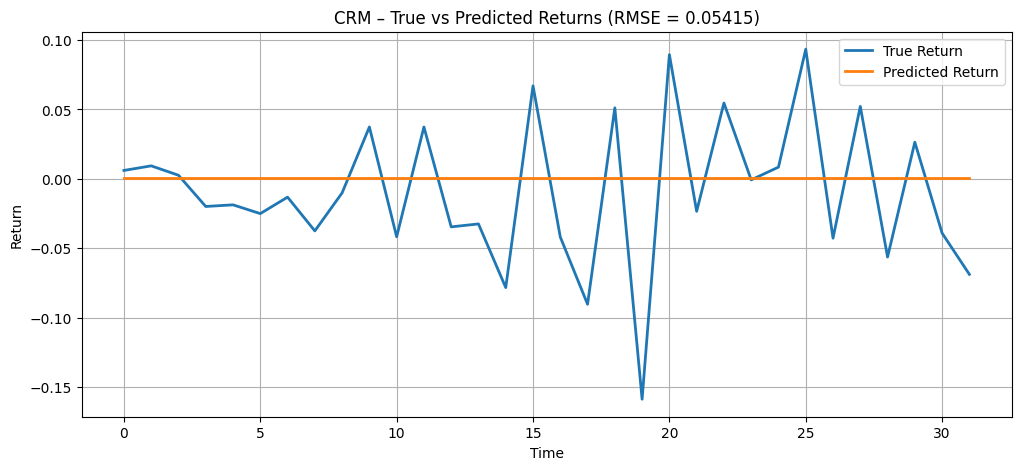

In [21]:
stock_name = train_df["Stock"].unique()[5]  # pick one

y_true, y_pred = predict_one_stock(
    model,
    test_df,
    stock_name,
    window=WINDOW,
    horizon=1
)

rmse = np.sqrt(mean_squared_error(y_true, y_pred))

plot_predictions(y_true, y_pred, stock_name, rmse)